In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
# 获取数据
second_group_Pres_filepath = r'气压后一半.xlsx'
WorkBook_BasedOnPres = pd.ExcelFile(second_group_Pres_filepath)

# 查看所有表格的名称
sheet_names = WorkBook_BasedOnPres.sheet_names   
i_first_group_sheet_data = pd.read_excel(second_group_Pres_filepath, sheet_names[0])
first_group_Wind = i_first_group_sheet_data['WMO_WIND']

In [4]:
wind_counts = first_group_Wind.value_counts().sort_index()

# 显示结果
print(wind_counts) 

'''
根据打印结果可以进行如下分类: 
对于 <= 980部分
40-60   总共2347 个
65-70  总共2348个
75-80   2109
85-90   1601
>=95    1419   


对于 > 980 hPa 的部分: 
35    总共 2277 个
40    总共 2045 个
45    总共 1896 个
>=50  总共 1918个
'''


35    2277
40    2045
45    1896
50    1367
55     406
60     110
65      25
70       4
75       6
Name: WMO_WIND, dtype: int64


'\n根据打印结果可以进行如下分类: \n对于 <= 980部分\n40-60   总共2347 个\n65-70  总共2348个\n75-80   2109\n85-90   1601\n>=95    1419   \n\n\n   对于 > 980 hPa 的部分: \n'

In [5]:
 pi = np.pi

for i_sheet in range(1):
    df_dicmapData = {} 
    DeepTCSize_R34_allData = i_first_group_sheet_data['DeepTCSize_R34'] * 1852  
    DeepTCSize_R50_allData = i_first_group_sheet_data['DeepTCSize_R50'] * 1852  
    DeepTCSize_R64_allData = i_first_group_sheet_data['DeepTCSize_R64'] * 1852  
    V_max_allData = i_first_group_sheet_data['WMO_WIND']
    R_Vmax_allData = i_first_group_sheet_data['DeepTCSize_RMW'] * 1852 
    
    single_sheet_IKE_List  = [] 
    for i_IKE in range(len(V_max_allData)): 
        # IKE  18 - 26      
        if DeepTCSize_R50_allData[i_IKE] > 0 :
            Mean_wind = 20 
            Area = pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( DeepTCSize_R50_allData[i_IKE]**2 )   )
            
        elif   np.isnan(DeepTCSize_R50_allData[i_IKE]) :
            if (V_max_allData[i_IKE] > 26) and (DeepTCSize_R34_allData[i_IKE] > R_Vmax_allData[i_IKE]) :
                Mean_wind = 20 
                Area =  pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( (0.75 *R_Vmax_allData[i_IKE] )**2)   ) 
                
            elif (V_max_allData[i_IKE] < 26 ) and (DeepTCSize_R34_allData[i_IKE] > R_Vmax_allData[i_IKE]) :
                Mean_wind = 0.25 * V_max_allData[i_IKE] + 0.75 * 18 
                Area =  pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( (0.75 *R_Vmax_allData[i_IKE] )**2)  )
            elif ((R_Vmax_allData[i_IKE] - DeepTCSize_R34_allData[i_IKE] ) < 1)  : 
                Mean_wind = 18 
                Area = pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( ((0.5) * DeepTCSize_R34_allData[i_IKE])**2 )) 
  
        IKE_34_50 = (1/2) * (Area)* (Mean_wind**2)
        
        
        
        # IKE 26 ~ 33
        R_33 =  DeepTCSize_R64_allData[i_IKE]
        V_Max = V_max_allData[i_IKE]
        R_26  = DeepTCSize_R50_allData[i_IKE]
        R_max = R_Vmax_allData[i_IKE]
        if R_33 > 0 : 
            Mean_wind = 27.75 
            Area = pi * ((R_26**2)  - ( R_33 **2) )
        elif np.isnan(R_33) : 
            if (V_Max > 33 and R_26 > R_max) :
                Mean_wind = 27.75 
                Area = pi * ((R_26**2)  -  ((0.75*R_max)**2) ) 
            elif (V_Max < 33 and R_26 > R_max) :
                Mean_wind = 0.25*V_Max + 0.75 * 26 
                Area = pi * ((R_26**2)  -  ((0.75*R_max)**2) ) 
            elif (R_26 <= R_max) : 
                Mean_wind = 26 
                Area = pi * ((R_26**2)  -  ((0.5*R_26)**2) ) 
        IKE_50_64 = (1/2) * Area * (Mean_wind**2)

        # IKE Hurricane ( wind speed supass 33 m/s) 
        R_max = R_Vmax_allData[i_IKE]
        R_33 =  DeepTCSize_R64_allData[i_IKE] 
        V_Max = V_max_allData[i_IKE]
        if V_Max > R_33 :
            if R_33 > R_max: 
                Mean_wind = 0.25 * V_Max + 0.75 * 33 
                Area = pi * [ (R_33**2 ) - ((0.75 * R_max)**2) ]
            elif (R_33 == R_max) :
                Mean_wind = 0.25 * V_Max + 0.75 * 33 
                Area = pi * [ (R_33**2 ) - ((0.75 * R_33)**2) ]
            elif (R_33 < R_max) :
                Mean_wind = 0.1 * V_Max + 0.9 * 33
                Area = pi * (R_33**2 ) - ((0.75 * R_33)**2) 
        else:
            Mean_wind = 0.1 * V_Max + 0.9 * 33
            Area = pi * (R_33**2 ) - ((0.75 * R_max)**2) 
        
        IKE_supass33_Hurricane = (1/2) * Area * (Mean_wind**2)

        # sum 
        Complete_IKE = IKE_34_50 + IKE_50_64 + IKE_supass33_Hurricane
        single_sheet_IKE_List.append(Complete_IKE / (10**12))           # 此时算得的能量的单位是 TJ



    # # 将数据先存储为一个字典, 之后将将字典转化为datafrome , 这样存储的更加快速一点. 
    df_dicmapData["IKE"] = single_sheet_IKE_List
    df_dicmapData['WMO_WIND']  =  i_first_group_sheet_data['WMO_WIND']
    df = pd.DataFrame(df_dicmapData)   


    # # 添加气压
    # df_dicmapData["PRE"] = single_sheet_other_col_var_List
    # df_2 = pd.DataFrame( df_dicmapData )  
    # df.to_excel(Save_Worksheet , sheet_name='PRE_SaveSheet'+ sheet_names[i_sheet] + '.xlsx', index=False) 
# Save_Worksheet.save()
# Save_Worksheet.close()

print(df)


            IKE  WMO_WIND
0           NaN        50
1           NaN        45
2           NaN        45
3     15.175601        55
4           NaN        45
...         ...       ...
8131        NaN        35
8132        NaN        35
8133        NaN        40
8134        NaN        35
8135        NaN        35

[8136 rows x 2 columns]


In [9]:
# 定义各个区间范围
range1 = 35
range2 = 40
range3 = 45
range4 = 50


# 对每个区间进行筛选并添加到新的DataFrame中
list1 = df.loc[df['WMO_WIND']==range1, 'IKE']
list2 = df.loc[df['WMO_WIND']==range2, 'IKE']
list3 = df.loc[df['WMO_WIND']==range3, 'IKE']
list4 = df.loc[df['WMO_WIND']>=range4, 'IKE']

all_lists = []
all_lists.append(list1)
all_lists.append(list2)
all_lists.append(list3)
all_lists.append(list4)



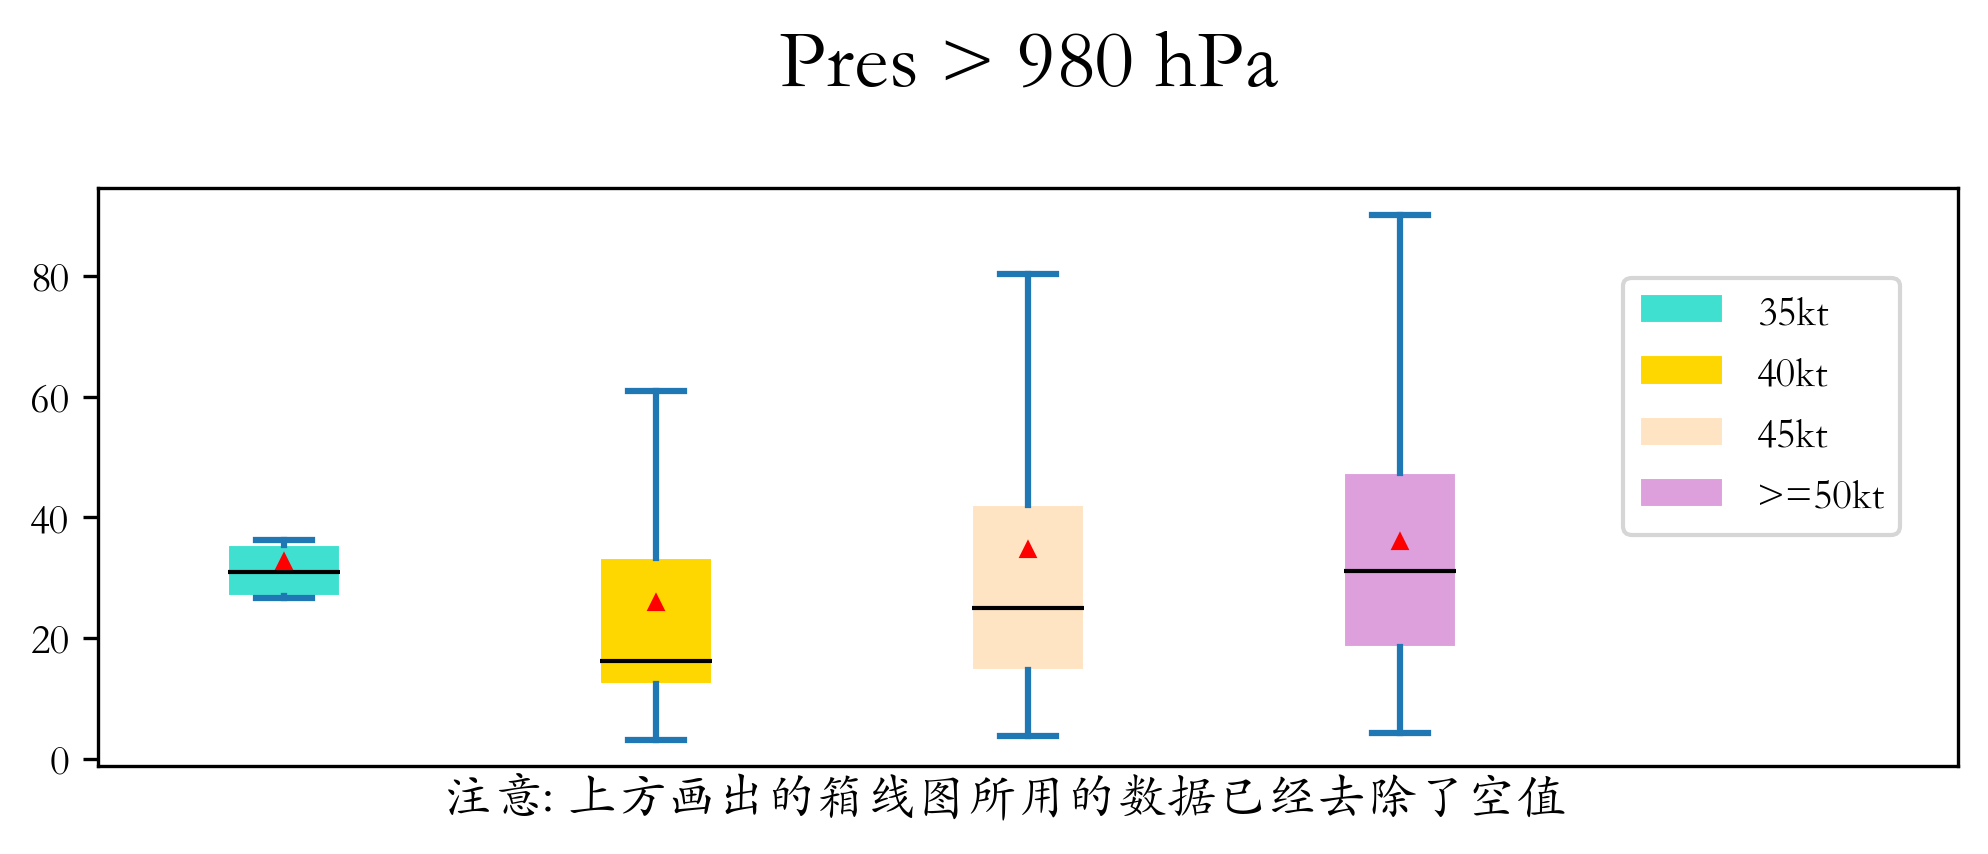

In [14]:
# 下面画  箱线图
fig, ax = plt.subplots(figsize = (8,2.5), dpi=300) 
# 防范中文乱码
plt.rcParams['font.sans-serif']=['STKaiti'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

label_various_range_list = ['35kt', '40kt', '45kt', '>=50kt', ]
for i in range(4): 
    if i == 0 : 
        facecolor = "turquoise"
        label = label_various_range_list[0]
    elif i== 1 : 
        facecolor = "gold" 
        label = label_various_range_list[1]
    elif i == 2 :
        facecolor = "bisque"
        label = label_various_range_list[2]
    elif i == 3 :
        facecolor = "plum"
        label = label_various_range_list[3] 

    VP = ax.boxplot(all_lists[i].dropna(),
                    positions= [i],
                    widths= 0.3,
                    showmeans=True, showfliers=False, patch_artist=True,
                    meanprops={"marker": '^',
                           "markeredgecolor": 'red',
                           "markerfacecolor": 'red',
                           "markersize": 3},
                    medianprops={"color": "black", "linewidth": 1},
                    boxprops={"facecolor": facecolor,
                              "edgecolor": "white",
                              "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5})  



# 下方代码是由于 画的图有点挤, 所以想多出一个位置来放图例
    VP = ax.boxplot([], 
                    positions= [4],
                    widths= 0.4,
                    showmeans=True, showfliers=False, patch_artist=True,
                    meanprops={"marker": '^',
                           "markeredgecolor": 'red',
                           "markerfacecolor": 'red',
                           "markersize": 6},
                    medianprops={"color": "black", "linewidth": 1},
                    boxprops={"facecolor": facecolor,
                              "edgecolor": "white",
                              "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5})  
    # 设置图例
    VP["boxes"][0].set_label(label)   # 其实获取到了 一个画布中的所有的箱体对象.  所以
    VP["medians"][0].set_label("_nolegend_")

ax.legend(loc=(0.82, 0.4) , fontsize=10)                     # 调整图例出现的位置
# ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # 设置y轴出现的刻度数量
ax.set_title("Pres > 980 hPa", fontsize=20, pad=25)
# fig.text(0.5,0.9, "(Cat. 3-5 Vmax)" , fontsize=15, ha="center")   # 这个是子标题
myself_Introduction = " 注意: 上方画出的箱线图所用的数据已经去除了空值"
fig.text(0.5,0.05, myself_Introduction , fontsize=12, ha="center" )
plt.xticks([])

plt.savefig("气压大于980.jpg",dpi=300)
plt.show()
